# Create a Basic Mapping of Broad IDs to MOAs and Targets

Here, I add the `pert_id` column to an additional file.
This file contains only the essential mapping columns between cell painting data and drug annotations.

The primary addition is truncating the `broad_id` column into the `pert_id` column (e.g. `BRD-K89787693-001-01-1` becomes `BRD-K89787693`) and describing the impact.

I create a new file (called `repurposing_info_basic.tsv`) that only contains the unique columns `pert_id`, `pert_iname`, `moa`, and `target`.

The `broad_id` column contains additional supplier, batch and aliquot information.
The `pert_id` column is the essential information that is used to directly map compounds to profiles.

In [1]:
import os
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
use_cols = ["pert_id", "pert_iname", "moa", "target"]

## Load Data and Create the `pert_id` column

In [4]:
annotation_df = pd.read_csv("repurposing_info.tsv", sep='\t')

annotation_df = annotation_df.assign(
    pert_id=annotation_df.broad_id.str.slice(0, 13)
)

print(annotation_df.shape)
annotation_df.head()

(10147, 18)


,broad_id,pert_iname,clinical_phase,moa,target,disease_area,indication,qc_incompatible,purity,vendor,catalog_no,vendor_name,expected_mass,smiles,InChIKey,pubchem_cid,deprecated_broad_id,pert_id
0,BRD-K89787693-001-01-1,"[sar9,met(o2)11]-substance-p",Preclinical,tachykinin antagonist,TACR1,NaN,NaN,0,NaN,Tocris,1178,2-({5-amino-2-[({1-[6-amino-2-({[1-(2-amino-5-...,"1,392.73",CC(C)C[C@H](NC(=O)CN(C)C(=O)[C@H](Cc1ccccc1)NC...,OUPXSLGGCPUZJJ-SARDKLJWSA-N,163829.0,NaN,BRD-K89787693
1,BRD-K70329400-001-02-5,A-1070722,Preclinical,glycogen synthase kinase inhibitor,GSK3A|GSK3B,NaN,NaN,0,97.36,Tocris,4431,A 1070722,362.099,COc1ccc2c(NC(=O)Nc3cccc(n3)C(F)(F)F)ccnc2c1,VQPBIJGXSXEOCU-UHFFFAOYSA-N,49830684.0,NaN,BRD-K70329400
2,BRD-K59060513-001-02-5,A-1120,Preclinical,retinoid receptor ligand,RBP4,NaN,NaN,0,83.72,Tocris,3793,A 1120,392.135,OC(=O)c1ccccc1NC(=O)N1CCC(CC1)c1ccccc1C(F)(F)F,MEAQCLPMSVEOQF-UHFFFAOYSA-N,25138295.0,NaN,BRD-K59060513
3,BRD-K38019854-323-01-4,A-317491,Preclinical,purinergic receptor antagonist,P2RX3,NaN,NaN,0,98.69,MedChemEx,HY-15568A,A-317491 (sodium salt hydrate),565.174,OC(=O)c1cc(C(O)=O)c(cc1C(O)=O)C(=O)N(Cc1cccc(O...,VQGBOYBIENNKMI-LJAQVGFWSA-N,9829395.0,NaN,BRD-K38019854
4,BRD-K38019854-001-01-6,A-317491,Preclinical,purinergic receptor antagonist,P2RX3,NaN,NaN,0,98.06,MedChemEx,HY-15568,A-317491,565.174,OC(=O)c1cc(C(O)=O)c(cc1C(O)=O)C(=O)N(Cc1cccc(O...,VQGBOYBIENNKMI-LJAQVGFWSA-N,9829395.0,NaN,BRD-K38019854


## Describe the Effect of adding `pert_id`

How many columns are replicated?

In [5]:
# There are no duplicate `broad_ids`
annotation_df.broad_id.duplicated().sum()

0

In [6]:
pert_counts = annotation_df.pert_id.value_counts()
pert_counts.head(10)

BRD-K41260949    8
BRD-K68432770    8
BRD-A01787639    7
BRD-K06519765    7
BRD-A34462049    7
BRD-K08547377    7
BRD-A22740840    7
BRD-K71879491    7
BRD-A85242401    6
BRD-K35458079    6
Name: pert_id, dtype: int64

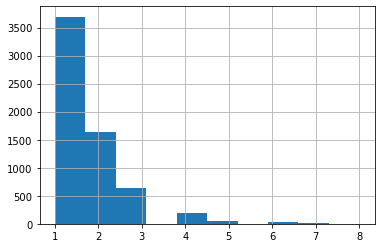

In [7]:
pert_counts.hist();

In [8]:
# How many pert ids are duplicated?
num_duplicate = (pert_counts > 1).sum()
percent_duplicate = (num_duplicate / pert_counts.shape[0]) * 100

print("There are {} ({}%) duplicated `pert_ids`".format(num_duplicate, percent_duplicate))

There are 2557 (40.912%) duplicated `pert_ids`


In [9]:
# Examples of duplicate pert_id columns
top_duplicated_pert_id = pert_counts.head(1).index.values[0]
annotation_df.query("pert_id == @top_duplicated_pert_id")

,broad_id,pert_iname,clinical_phase,moa,target,disease_area,indication,qc_incompatible,purity,vendor,catalog_no,vendor_name,expected_mass,smiles,InChIKey,pubchem_cid,deprecated_broad_id,pert_id
2914,BRD-K41260949-236-20-0,divalproex-sodium,Launched,benzodiazepine receptor agonist,ALDH5A1,neurology/psychiatry,epilepsy|seizures,0,42.10,Selleck,S1703,Divalproex sodium,144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,BRD-M19962486-236-03-2,BRD-K41260949
2915,BRD-K41260949-236-19-2,divalproex-sodium,Launched,benzodiazepine receptor agonist,ALDH5A1,neurology/psychiatry,epilepsy|seizures,0,23.50,Selleck,S1703,Divalproex Sodium,144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,BRD-M19962486-236-02-4,BRD-K41260949
2916,BRD-K41260949-001-18-2,divalproex-sodium,Launched,benzodiazepine receptor agonist,ALDH5A1,neurology/psychiatry,epilepsy|seizures,0,65.88,Sigma,MFCD00002672,2-propylpentanoic acid,144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,NaN,BRD-K41260949
9484,BRD-K41260949-236-15-0,valproic-acid,Launched,HDAC inhibitor,ABAT|ACADSB|ALDH5A1|HDAC1|HDAC2|HDAC9|OGDH|SCN...,neurology/psychiatry,seizures,0,96.04,Selleck,S1168,Valproic acid sodium salt (Sodium valproate),144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,NaN,BRD-K41260949
9485,BRD-K41260949-236-18-4,valproic-acid,Launched,HDAC inhibitor,ABAT|ACADSB|ALDH5A1|HDAC1|HDAC2|HDAC9|OGDH|SCN...,neurology/psychiatry,seizures,0,41.51,EMDBio,676380-5GM,"Valproic Acid, Sodium Salt",144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,NaN,BRD-K41260949
9486,BRD-K41260949-236-16-8,valproic-acid,Launched,HDAC inhibitor,ABAT|ACADSB|ALDH5A1|HDAC1|HDAC2|HDAC9|OGDH|SCN...,neurology/psychiatry,seizures,0,96.83,MicroSource,1500606,VALPROATE SODIUM,144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,NaN,BRD-K41260949
9487,BRD-K41260949-236-17-6,valproic-acid,Launched,HDAC inhibitor,ABAT|ACADSB|ALDH5A1|HDAC1|HDAC2|HDAC9|OGDH|SCN...,neurology/psychiatry,seizures,0,31.39,Enzo,550-304,"Valproic Acid, Sodium Salt",144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,NaN,BRD-K41260949
9488,BRD-K41260949-236-21-8,valproic-acid,Launched,HDAC inhibitor,ABAT|ACADSB|ALDH5A1|HDAC1|HDAC2|HDAC9|OGDH|SCN...,neurology/psychiatry,seizures,0,2.38,Tocris,2815,"Valproic acid, sodium salt",144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,NaN,BRD-K41260949


## Select only essential columns and determine/reconcile any discrepancies

In [10]:
basic_df = annotation_df.loc[:, use_cols].drop_duplicates()

print(basic_df.shape)
basic_df.head()

(6266, 4)


,pert_id,pert_iname,moa,target
0,BRD-K89787693,"[sar9,met(o2)11]-substance-p",tachykinin antagonist,TACR1
1,BRD-K70329400,A-1070722,glycogen synthase kinase inhibitor,GSK3A|GSK3B
2,BRD-K59060513,A-1120,retinoid receptor ligand,RBP4
3,BRD-K38019854,A-317491,purinergic receptor antagonist,P2RX3
5,BRD-A40302156,A-33903,NaN,NaN


In [11]:
duplicated_pert_ids = basic_df.pert_id.loc[basic_df.pert_id.duplicated()]
print("There are {} perturbation ids with alternative information".format(len(duplicated_pert_ids)))

There are 16 perturbation ids with alternative information


In [12]:
# What do the duplicated IDs look like?
basic_df.query("pert_id in @duplicated_pert_ids").sort_values(by="pert_id").reset_index(drop=True)

,pert_id,pert_iname,moa,target
0,BRD-A03204438,allopregnanolone,GABA receptor positive allosteric modulator,GABRA1|GABRA2|GABRA3|GABRA4|GABRA5|GABRA6|GABR...
1,BRD-A03204438,pregnanolone,GABA receptor positive allosteric modulator,NaN
2,BRD-K05674516,sofosbuvir,RNA polymerase inhibitor,NaN
3,BRD-K05674516,PSI-7976,HCV inhibitor,NaN
4,BRD-K17498618,betaxolol,adrenergic receptor antagonist,ADRB1|ADRB2
5,BRD-K17498618,cisatracurium,acetylcholine receptor antagonist,CHRNA2
6,BRD-K20672254,pyrantel-tartrate,acetylcholine receptor agonist,CHRNA1
7,BRD-K20672254,pyrantel-pamoate,neuromuscular blocker,NaN
8,BRD-K25650355,physostigmine-salicylate,acetylcholinesterase inhibitor,NaN
9,BRD-K25650355,physostigmine,cholinesterase inhibitor,ACHE|BCHE
